In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import re
import json


# recuperation des données

In [203]:
file=open("equipes.txt")
line_list=file.readlines()
line_list

['Triple EZpresso\n',
 'Haylko (steamer) C                        \n',
 'Azezlan (osamodas)\n',
 'Scardoigdansleulc (enutrof)\n',
 '\n',
 'Les renards migrants\n',
 'Eclair-choco (zobal) C\n',
 'Chobei (pandawa)\n',
 'Harmatan (steamer)\n',
 '\n',
 '[Moderna]\n',
 'Archie (sadida) C\n',
 'Alcyon (zobal)\n',
 'Bob (cra)\n',
 '\n',
 'Honored\n',
 'Epa-temps (xelor) C\n',
 'Warpoudlard (steamer)\n',
 'Ell-Buchorr (cra)\n',
 '\n',
 '-BLACK PEARL- \n',
 'bp-bogota (feca) [c]\n',
 'Maman-dear (steamer)\n',
 'Quads (pandawa)\n',
 '\n',
 'En Detente\n',
 'Kharnages (sacrieur)\n',
 'Zhink (steamer) C\n',
 'Wellcome (ecaflip)\n',
 '\n',
 'Juste Ici Gamin \n',
 'Djonko (steamer) C\n',
 'Impres (osamodas)\n',
 'Quuwhu (enutrof)\n',
 '\n',
 'SINALOA\n',
 'Google-store (iop) C \n',
 'Baroko (steamer) \n',
 'Stratham (pandawa)\n',
 '\n',
 'IMMO\n',
 'Ammateratsuu (ecaflip) C\n',
 'Goutez (steamer)\n',
 'Really-queen (feca)\n',
 '\n',
 'IMMO2\n',
 'Kekeo-o (zobal) C\n',
 'Gaea-ez (steamer)\n',
 'Noxam

In [204]:
line_list[0][:-1]

'Triple EZpresso'

In [205]:
def extract_name_class(line):
    spl=line.split()#re.split("(",line)
    print(spl)
    spl[1]=spl[1][1:-1]
    return spl[0:2]

extract_name_class(line_list[1])

['Haylko', '(steamer)', 'C']


['Haylko', 'steamer']

In [206]:
equipes=[]
joueurs=dict()
joueurs[1]=[]
joueurs[2]=[]
joueurs[3]=[]
classes=dict()
classes[1]=[]
classes[2]=[]
classes[3]=[]


state=0
for line in line_list:
    if state==0:
        equipes.append(line[:-1])
    elif state>0 and state<4:
        print(line,state)
        name_class=extract_name_class(line)
        joueurs[state].append(name_class[0])
        classes[state].append(name_class[1])
    else:
        pass
    state=(state+1)%5

Haylko (steamer) C                        
 1
['Haylko', '(steamer)', 'C']
Azezlan (osamodas)
 2
['Azezlan', '(osamodas)']
Scardoigdansleulc (enutrof)
 3
['Scardoigdansleulc', '(enutrof)']
Eclair-choco (zobal) C
 1
['Eclair-choco', '(zobal)', 'C']
Chobei (pandawa)
 2
['Chobei', '(pandawa)']
Harmatan (steamer)
 3
['Harmatan', '(steamer)']
Archie (sadida) C
 1
['Archie', '(sadida)', 'C']
Alcyon (zobal)
 2
['Alcyon', '(zobal)']
Bob (cra)
 3
['Bob', '(cra)']
Epa-temps (xelor) C
 1
['Epa-temps', '(xelor)', 'C']
Warpoudlard (steamer)
 2
['Warpoudlard', '(steamer)']
Ell-Buchorr (cra)
 3
['Ell-Buchorr', '(cra)']
bp-bogota (feca) [c]
 1
['bp-bogota', '(feca)', '[c]']
Maman-dear (steamer)
 2
['Maman-dear', '(steamer)']
Quads (pandawa)
 3
['Quads', '(pandawa)']
Kharnages (sacrieur)
 1
['Kharnages', '(sacrieur)']
Zhink (steamer) C
 2
['Zhink', '(steamer)', 'C']
Wellcome (ecaflip)
 3
['Wellcome', '(ecaflip)']
Djonko (steamer) C
 1
['Djonko', '(steamer)', 'C']
Impres (osamodas)
 2
['Impres', '(osamo

In [207]:
team=pd.DataFrame()
team["equipes"]=equipes
team["J1"]=joueurs[1]
team["J2"]=joueurs[2]
team["J3"]=joueurs[3]
team["C1"]=classes[1]
team["C2"]=classes[2]
team["C3"]=classes[3]

In [208]:
team

,equipes,J1,J2,J3,C1,C2,C3
0,Triple EZpresso,Haylko,Azezlan,Scardoigdansleulc,steamer,osamodas,enutrof
1,Les renards migrants,Eclair-choco,Chobei,Harmatan,zobal,pandawa,steamer
2,[Moderna],Archie,Alcyon,Bob,sadida,zobal,cra
3,Honored,Epa-temps,Warpoudlard,Ell-Buchorr,xelor,steamer,cra
4,-BLACK PEARL-,bp-bogota,Maman-dear,Quads,feca,steamer,pandawa
5,En Detente,Kharnages,Zhink,Wellcome,sacrieur,steamer,ecaflip
6,Juste Ici Gamin,Djonko,Impres,Quuwhu,steamer,osamodas,enutrof
7,SINALOA,Google-store,Baroko,Stratham,iop,steamer,pandawa
8,IMMO,Ammateratsuu,Goutez,Really-queen,ecaflip,steamer,feca
9,IMMO2,Kekeo-o,Gaea-ez,Noxama,zobal,steamer,ecaflip


In [209]:
team['C1'].unique()

array(['steamer', 'zobal', 'sadida', 'xelor', 'feca', 'sacrieur', 'iop',
       'ecaflip', 'pandawa'], dtype=object)

In [210]:
team['C2'].unique()

array(['osamodas', 'pandawa', 'zobal', 'steamer', 'cra', 'iop',
       'sacrieur', 'feca', 'xelor'], dtype=object)

In [211]:
team['C3'].unique()

array(['enutrof', 'steamer', 'cra', 'pandawa', 'ecaflip', 'feca',
       'eniripsa', 'iop', 'zobal', 'roublard'], dtype=object)

# fonctions utiles

In [212]:
def dict_count_val_over(dic,limit):
    count=0
    for v in dic.values():
        if v>limit:
            count+=1
    return count

In [213]:
#fonction qui sert à filtrer et enlever les keys dont la valeur est en dessous de 3

def filterTheDict(dictObj, callback):
    newDict = dict()
    # Iterate over all the items in dictionary
    for (key, value) in dictObj.items():
        # Check if item satisfies the given condition then add to new dict
        if callback((key, value)):
            newDict[key] = value
    return newDict

In [214]:
def dict_barh(dic,title="michel",sort=False,save=False,sortby="no_sort_df"):
    
    if sort:
        dic_s=dict(sorted(dic.items(), key=lambda item: item[1]))
    else:
        if sortby!="no_sort_df":    
            sortby_s=dict(sorted(sortby.items(), key=lambda item: item[1]))

            dic_s=dict()
            for k in sortby_s.keys():
                dic_s[k]=dic[k]
        else:
            dic_s=dic
    compp=dic_s.items()
    x, y = zip(*compp)   
    # print(x,y)
    offset_text=(max(y)/60)

    fig, ax=plt.subplots(figsize=(10,5),facecolor='#7B7826')
    ax.set_facecolor("#B69E44")

    x_strip=[k.replace("{","").replace("}","").replace('"',"").replace("'","").replace("[","").replace("]","") for k in x]
    ax.barh(x_strip, y,facecolor='#231D0F')
    for i in range(len(x)):
        ax.text( y[i]+offset_text,i, y[i], ha='left',va="center",color='black')

    if title!="michel":
        ax.set_title(title)
    plt.tight_layout()

    if save:
        plt.savefig("graphs/"+title+'.png')
    
    plt.show()

In [215]:
def sum_dict(d1,d2):
    return {k: d1.get(k, 0) + d2.get(k, 0) for k in set(d1) | set(d2)}

In [221]:
def subsets(s):
    sl=list(s)
    return [{sl[0],sl[1]},{sl[0],sl[2]},{sl[1],sl[2]}]

subsets({'Herdegrize', 'Oshimo', 'Terra Cogita'})   

[{'Herdegrize', 'Oshimo'},
 {'Herdegrize', 'Terra Cogita'},
 {'Oshimo', 'Terra Cogita'}]

# pickrate compo

In [216]:
def pickrate_compo(df,filter=-1):

    temp_df=df.copy()

    compo_count=dict()

    
    for idx, row in temp_df.iterrows():
        # ss={row["classe_J1"],row["classe_J2"],row["classe_J3"]}
        ss=[row["C1"],row["C2"],row["C3"]]
        ss.sort()

        if len(ss)>2:
            if str(ss) in compo_count.keys():
                compo_count[str(ss)]+=1
            else:
                compo_count[str(ss)]=1

    if filter=="auto":
        temp_filter=0
        while(dict_count_val_over(compo_count,temp_filter)>25):
            temp_filter+=1
        if temp_filter>0:
            compo_count=filterTheDict(compo_count, lambda elem : elem[1] > temp_filter)

    elif filter>=0:
        compo_count=filterTheDict(compo_count, lambda elem : elem[1] > filter)

    # dict_barh(compo_count,sort=True,title=title)
    return compo_count

In [217]:
pickrate_compo(team,filter="auto")

{"['enutrof', 'osamodas', 'steamer']": 2,
 "['pandawa', 'steamer', 'zobal']": 3,
 "['cra', 'sadida', 'zobal']": 1,
 "['cra', 'steamer', 'xelor']": 5,
 "['feca', 'pandawa', 'steamer']": 6,
 "['ecaflip', 'sacrieur', 'steamer']": 1,
 "['iop', 'pandawa', 'steamer']": 2,
 "['ecaflip', 'feca', 'steamer']": 1,
 "['ecaflip', 'steamer', 'zobal']": 1,
 "['cra', 'eniripsa', 'steamer']": 1,
 "['eniripsa', 'iop', 'steamer']": 1,
 "['iop', 'sacrieur', 'steamer']": 1,
 "['feca', 'iop', 'pandawa']": 1,
 "['pandawa', 'roublard', 'sacrieur']": 1}

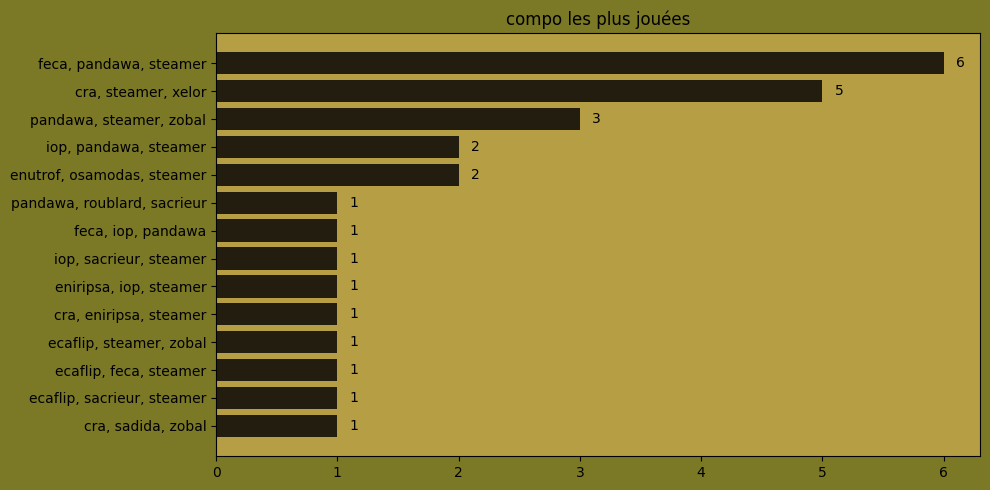

In [218]:
dict_barh(pickrate_compo(team,filter="auto"),sort=True,title="compo les plus jouées",save=True)

# pickrate classes

In [219]:
def pickrate_classes(df):
   list_classes=['xelor', 'enutrof', 'eniripsa', 'osamodas', 'zobal', 'sadida',
       'steamer', 'sacrieur', 'iop', 'pandawa', 'ecaflip', 'cra', 'feca',
       'sram', 'roublard']
   base=dict()
   # list_classes=df["classe_J1"].unique()
   for c in list_classes:
      base[c]=0

   temp_df=df

   j1=temp_df.groupby(by=["C1"])["equipes"].count().to_dict()
   j2=temp_df.groupby(by=["C2"])["equipes"].count().to_dict()
   j3=temp_df.groupby(by=["C3"])["equipes"].count().to_dict()
   
   pick_c=sum_dict(sum_dict(sum_dict(base,j1),j2),j3)

   return pick_c

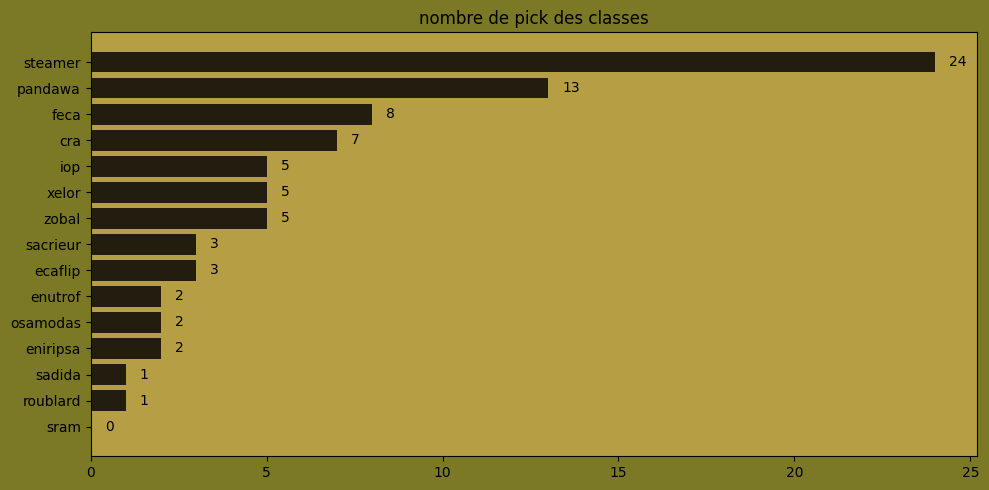

In [220]:
dict_barh(pickrate_classes(team),sort=True,title="nombre de pick des classes",save=True)

# pickrate duos

In [225]:
def pickrate_duos(df,filter=-1):
    
    
    temp_df=df.copy()
    # title="duos les plus jouées"

    duo_count=dict()
    
    for idx, row in temp_df.iterrows():
        # ss={row["classe_J1"],row["classe_J2"],row["classe_J3"]}
        ss=[row["C1"],row["C2"],row["C3"]]
        ss.sort()
        if len(ss)==2:
            if str(ss) in duo_count.keys():
                duo_count[str(ss)]+=1
            else:
                duo_count[str(ss)]=1
        elif len(ss)==3:
            sub_list=subsets(ss)
            for sb in sub_list:
                if str(sb) in duo_count.keys():
                    duo_count[str(sb)]+=1
                else:
                    duo_count[str(sb)]=1

    if filter=="auto":
        temp_filter=0
        while(dict_count_val_over(duo_count,temp_filter)>25):
            temp_filter+=1
        if temp_filter>0:
            duo_count=filterTheDict(duo_count, lambda elem : elem[1] > temp_filter)
    elif filter>=0:
        duo_count=filterTheDict(duo_count, lambda elem : elem[1] > filter)

    # dict_barh(duo_count,sort=True,title=title)
    return duo_count

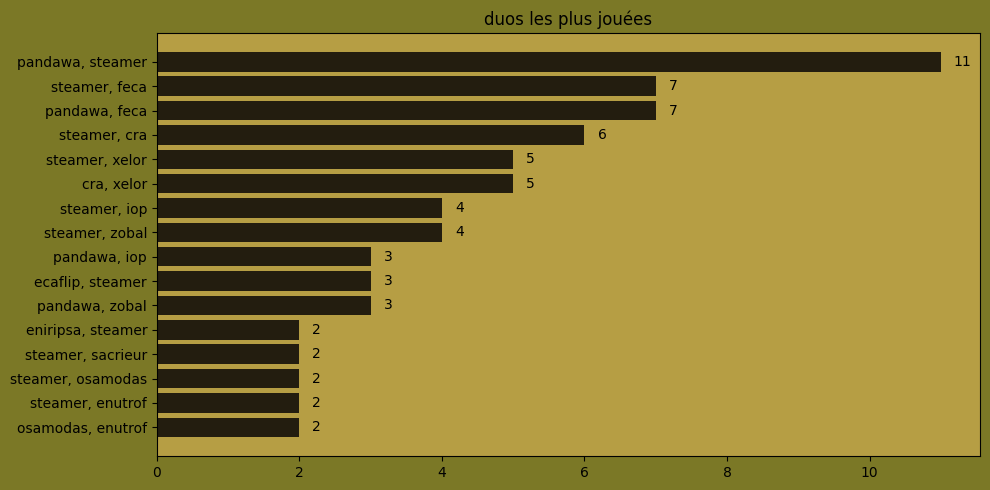

In [228]:
dict_barh(pickrate_duos(team,filter="auto"),sort=True,title="duos les plus jouées",save=True)